In [2]:
import numpy as np
import math
import seaborn as sns
import  statsmodels.stats.multitest
import matplotlib.pyplot as plt
import scipy
import scanpy as sc
from statannot import add_stat_annotation
from scipy import stats
import pandas as pd
#from adjustText import adjust_text

In [3]:
pth='Results/'

### Figure 2A-C

In [4]:
##meta data
sc_data=sc.read_csv('/data/incubator/bhavya/projects/Immunoproteosome/RNA-seq/GSE132465_GEO_processed_CRC_10X_raw_UMI_count_matrix.txt.gz',delimiter="\t")
sc_data=sc_data.transpose()

In [5]:
meta=pd.read_csv(pth+"colon1_score.csv",index_col=0)

In [ ]:
sc.pp.normalize_total(sc_data, target_sum=1e4)
sc.pp.log1p(sc_data)
sc.pp.scale(sc_data, max_value=10)
sc.tl.pca(sc_data, svd_solver='auto')

sc.pp.neighbors(sc_data,n_neighbors=10, n_pcs=20)
sc.tl.leiden(sc_data,resolution=0.1)
sc.tl.tsne(sc_data)

In [9]:
meta.index=meta['Index']
sc_data.obs['Immuno']=meta['Immunoproteasome']
sc_data.obs['Const_proteasome']=meta['Const_proteasome']
sc_data.obs['Cell_type']=meta['Cell_type'].astype('category')

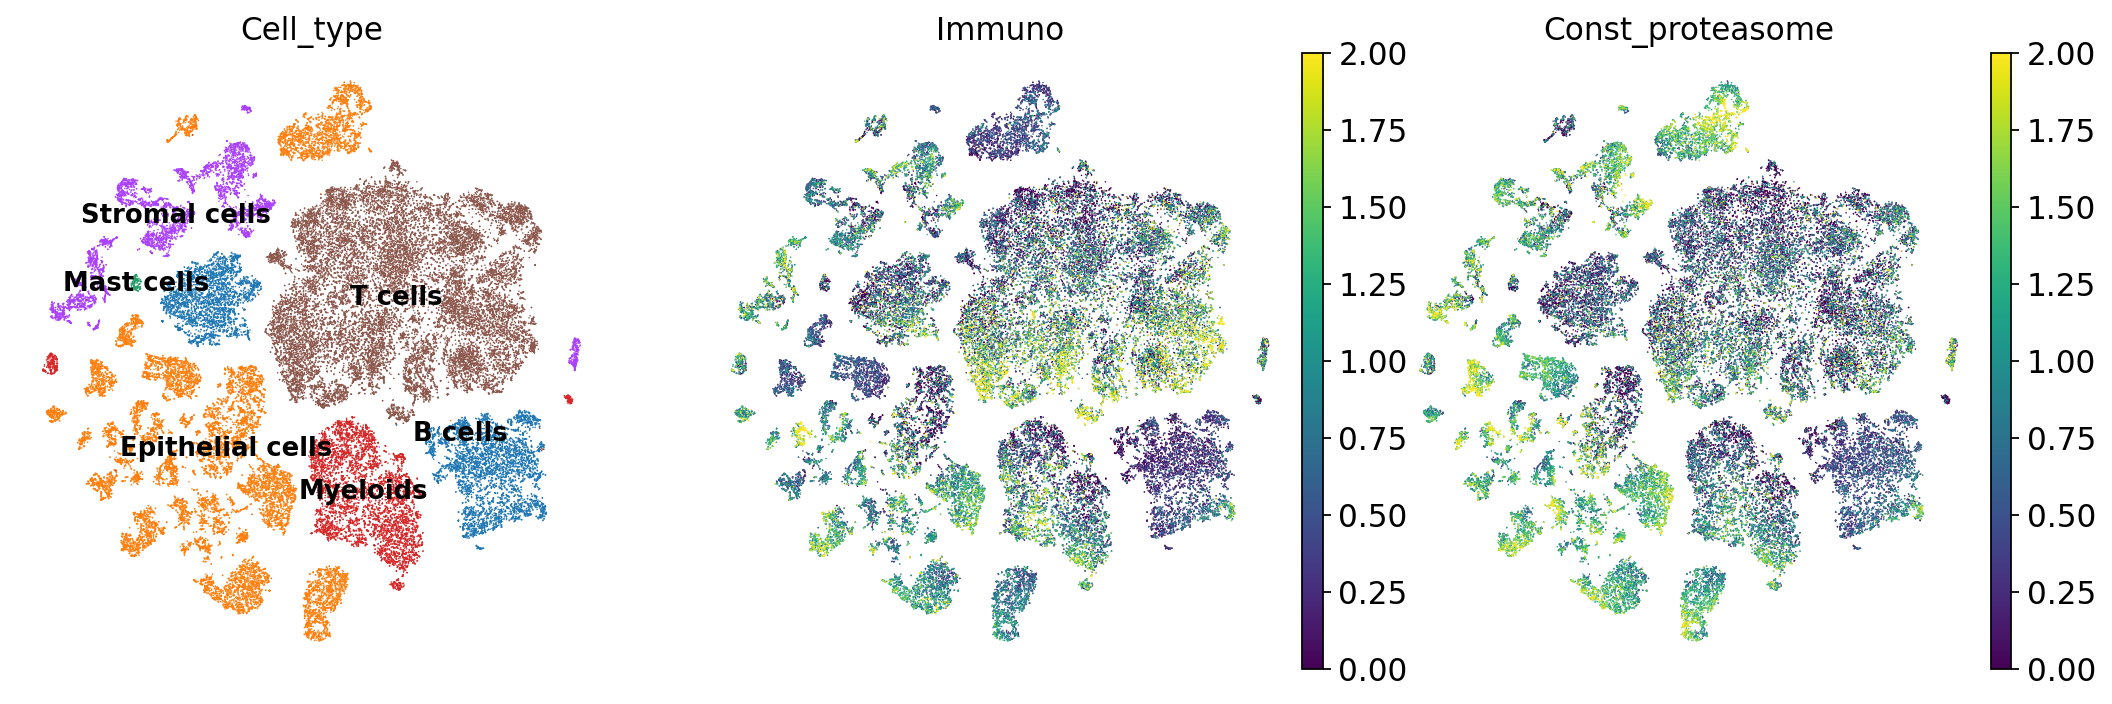

In [29]:
sc.set_figure_params(figsize=(5,5),dpi_save=200)=
sc.pl.tsne(sc_data,color=['Cell_type','Immuno','Const_proteasome'],legend_loc='on data',legend_fontsize='small',frameon=False,wspace=0.06,save=pth+"Figure2A.png",color_map='viridis',vmax=2)

### Figure 2D

In [14]:
all_sc=pd.read_csv(pth+"All_studies.csv")
all_sc.head()

,Sample,cell-type,Immunoproteasome,Const_proteasome,Tumour
0,CID3586_AAGACCTCAGCATGAG,Endothelial,1.615873,0.556785,Breast
1,CID3586_AAGGTTCGTAGTACCT,Endothelial,0.921402,0.000000,Breast
2,CID3586_ACCAGTAGTTGTGGCC,Endothelial,0.000000,0.000000,Breast
3,CID3586_ACCCACTAGATGTCGG,Endothelial,0.000000,0.000000,Breast
4,CID3586_ACTGATGGTCAACTGT,Endothelial,0.924984,0.924984,Breast


In [15]:
temp2=pd.melt(all_sc, id_vars=[ 'Sample', 'cell-type', 'Tumour'], value_vars=['Const_proteasome','Immunoproteasome'])

In [16]:
temp2['Tumour'].unique()

array(['Breast', 'Colon1', 'Colon2', 'Prostate', 'Liver', 'Pancreas',
       'Lung', 'Kidney', 'Ovarian', 'Oral'], dtype=object)

Plotting IP expression in Epithelial cell for 10X studies

In [17]:
cp_ip={'Const_proteasome': '#BF812D', 'Immunoproteasome': '#35978F'}

In [18]:
cl=['Epithelial-cell']
studies=['Breast','Colon1','Prostate', 'Liver',
       'Pancreas', 'Kidney','Ovarian','Lung' ]

In [19]:
box_pairs=[]
for i in studies:
    t1=((i,'Const_proteasome'),(i,'Immunoproteasome'))
    box_pairs.append(t1)

Ovarian_Const_proteasome v.s. Ovarian_Immunoproteasome: Mann-Whitney-Wilcoxon test greater with Bonferroni correction, P_val=3.132e-158 U_stat=5.076e+05
Colon1_Const_proteasome v.s. Colon1_Immunoproteasome: Mann-Whitney-Wilcoxon test greater with Bonferroni correction, P_val=0.000e+00 U_stat=2.194e+08
Breast_Const_proteasome v.s. Breast_Immunoproteasome: Mann-Whitney-Wilcoxon test greater with Bonferroni correction, P_val=0.000e+00 U_stat=4.435e+08
Prostate_Const_proteasome v.s. Prostate_Immunoproteasome: Mann-Whitney-Wilcoxon test greater with Bonferroni correction, P_val=0.000e+00 U_stat=9.061e+07
Liver_Const_proteasome v.s. Liver_Immunoproteasome: Mann-Whitney-Wilcoxon test greater with Bonferroni correction, P_val=4.011e-294 U_stat=5.891e+06
Pancreas_Const_proteasome v.s. Pancreas_Immunoproteasome: Mann-Whitney-Wilcoxon test greater with Bonferroni correction, P_val=1.398e-18 U_stat=3.038e+06
Kidney_Const_proteasome v.s. Kidney_Immunoproteasome: Mann-Whitney-Wilcoxon test greater w

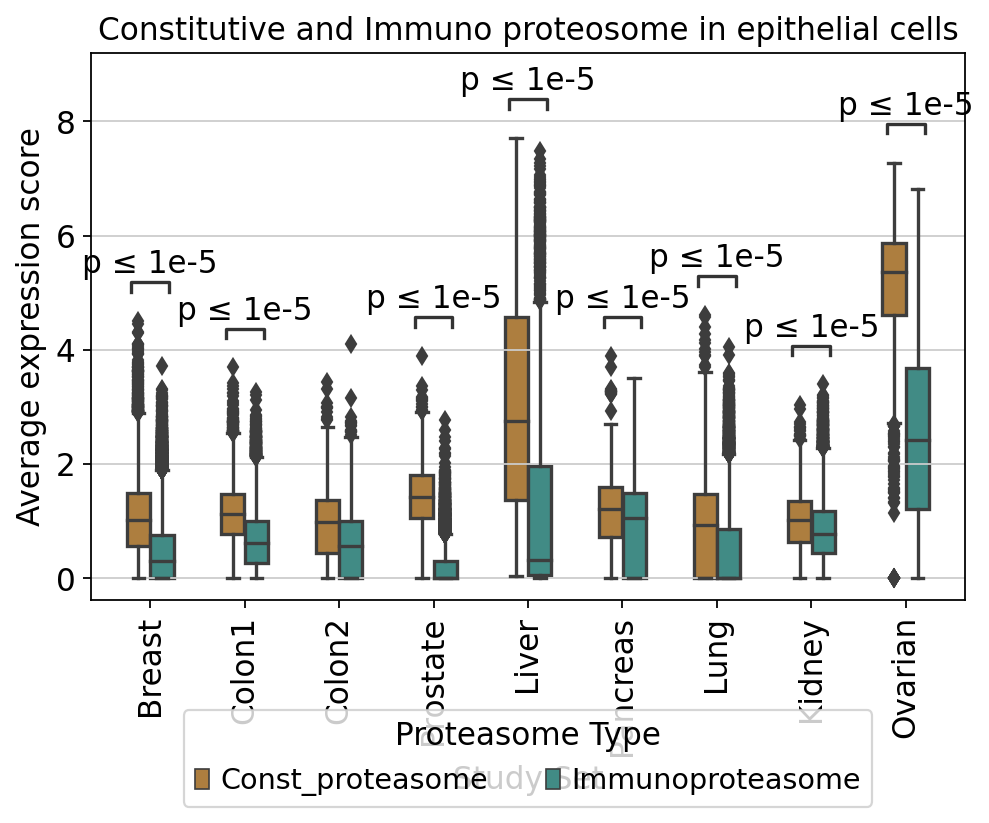

In [20]:
fig, ax=plt.subplots(figsize=(7,4.5)) 
res=sns.boxplot(x='Tumour',y='value',hue='variable',data=temp2[(temp2['cell-type'].isin(cl))&(~temp2['Tumour'].isin(['Oral']))],width=.5,ax=ax,palette=cp_ip)
add_stat_annotation(res, data=temp2[(temp2['cell-type'].isin(cl))&(~temp2['Tumour'].isin(['Oral']))], x='Tumour',y='value',hue='variable' ,box_pairs=box_pairs,test='Mann-Whitney-gt', text_format='simple', loc='inside', verbose=2)
plt.xticks(rotation=90)
plt.title('Constitutive and Immuno proteosome in epithelial cells')
handles, labels = ax.get_legend_handles_labels()
ax.legend( handles=handles, labels=labels,loc='upper center', bbox_to_anchor=(0.5, -0.2),fancybox=True, ncol=5,borderaxespad=0.,title='Proteasome Type')
ax.set_xlabel("Study Set")
ax.set_ylabel("Average expression score")
plt.savefig(pth+'Figure2D.svg',bbox_inches = "tight",format='svg')
plt.show()

In [21]:
cl=['Epithelial-cell']
studies=['Oral']

In [22]:
box_pairs=[]
for i in studies:
    t1=((i,'Const_proteasome'),(i,'Immunoproteasome'))
    box_pairs.append(t1)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Oral_Const_proteasome v.s. Oral_Immunoproteasome: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.957e-169 U_stat=4.672e+06


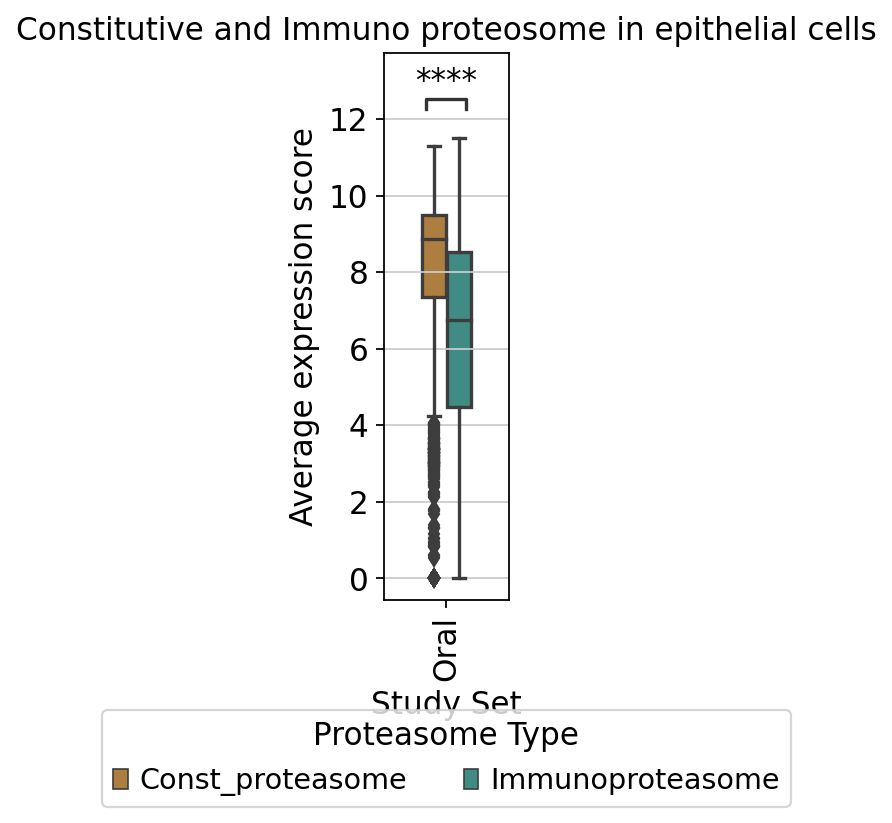

In [23]:
fig, ax=plt.subplots(figsize=(1,4.5)) 
res=sns.boxplot(x='Tumour',y='value',hue='variable',data=temp2[(temp2['cell-type'].isin(cl))&(temp2['Tumour'].isin(['Oral']))],width=.5,ax=ax,palette=cp_ip)
add_stat_annotation(res, data=temp2[(temp2['cell-type'].isin(cl))&(temp2['Tumour'].isin(['Oral']))], x='Tumour',y='value',hue='variable' ,box_pairs=box_pairs,test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
plt.xticks(rotation=90)
plt.title('Constitutive and Immuno proteosome in epithelial cells')
handles, labels = ax.get_legend_handles_labels()
ax.legend( handles=handles, labels=labels,loc='upper center', bbox_to_anchor=(0.5, -0.2),fancybox=True, ncol=5,borderaxespad=0.,title='Proteasome Type')
ax.set_xlabel("Study Set")
ax.set_ylabel("Average expression score")
plt.savefig(pth+'Figure2D1.svg',bbox_inches = "tight",format='svg')
plt.show()

### Figure 2E

In [83]:
temp=pd.read_csv(pth+"colon2_border.csv",index_col=0)
temp.head()

,Class,Cell_type,variable,value
0,Tumor,Epithelial cells,Const_proteasome,1.000000
1,Tumor,Epithelial cells,Const_proteasome,0.000000
2,Tumor,Epithelial cells,Const_proteasome,1.464106
3,Tumor,Epithelial cells,Const_proteasome,2.043094
4,Tumor,Epithelial cells,Const_proteasome,1.666667


In [77]:
box_pairs=[]
for i in temp2['variable'].unique():
    t1=((i,'Tumor'),(i,'Border'))
    box_pairs.append(t1)

In [78]:
temp2.groupby(['Class','variable']).median()

value
Class  variable                  
Border Const_proteasome  1.000000
       Immunoproteasome  0.666667
Tumor  Const_proteasome  0.666667
       Immunoproteasome  0.333333

Immunoproteasome_Tumor v.s. Immunoproteasome_Border: Mann-Whitney-Wilcoxon test smaller with Bonferroni correction, P_val=3.220e-17 U_stat=2.687e+06
Const_proteasome_Tumor v.s. Const_proteasome_Border: Mann-Whitney-Wilcoxon test smaller with Bonferroni correction, P_val=9.848e-19 U_stat=2.662e+06


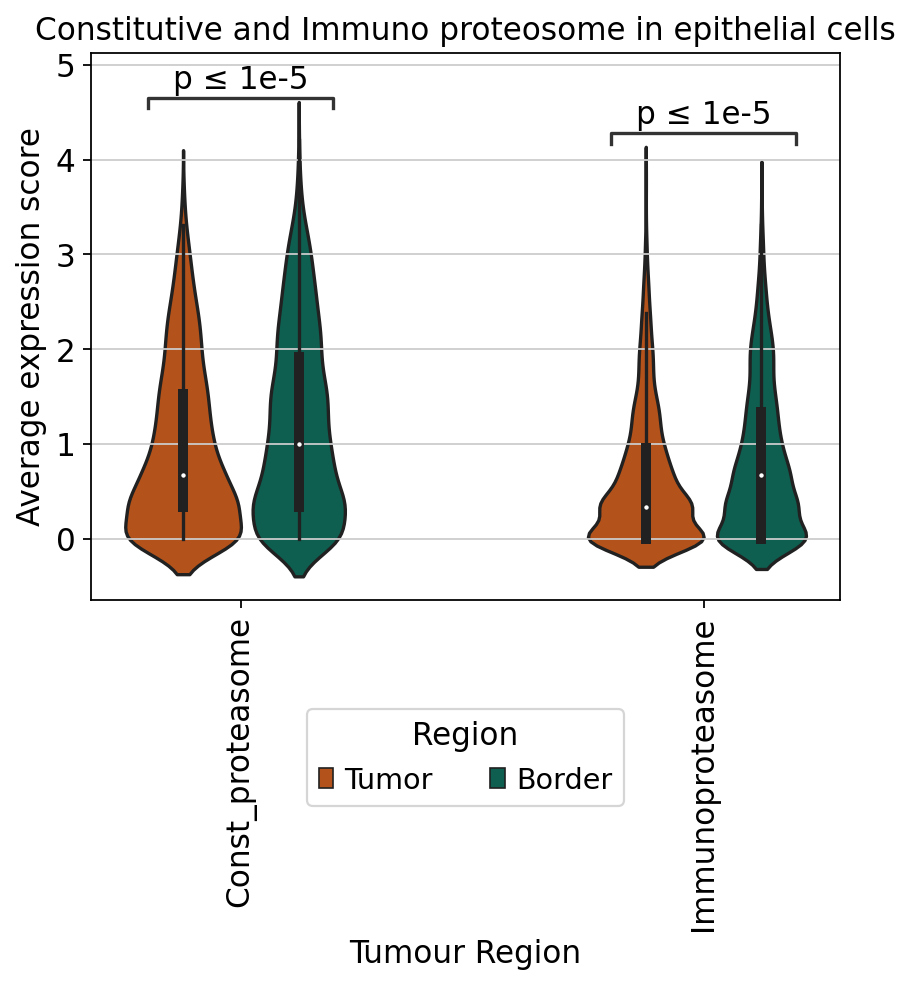

In [43]:
fig, ax=plt.subplots(figsize=(6,4.5)) 
res=sns.violinplot(x='variable',y='value',hue='Class',data=temp2,width=.5,ax=ax,palette=['#cc4c02','#016c59'])
add_stat_annotation(res, data=temp2, x='variable',y='value',hue='Class' ,box_pairs=box_pairs,test='Mann-Whitney-ls', text_format='simple', loc='inside', verbose=2)
plt.xticks(rotation=90)
plt.title('Constitutive and Immuno proteosome in epithelial cells')
handles, labels = ax.get_legend_handles_labels()
ax.legend( handles=handles, labels=labels,loc='upper center', bbox_to_anchor=(0.5, -0.2),fancybox=True, ncol=5,borderaxespad=0.,title='Region')
ax.set_xlabel("Tumour Region")
ax.set_ylabel("Average expression score")
plt.savefig(pth+'Figure2E.svg',bbox_inches = "tight",format='svg')
plt.show()

### Figure 2G

In [44]:
studies=['Breast','Colon1','Lung',
       'Liver', 'Kidney','Ovarian' ]

In [45]:
sel=all_sc[(all_sc['cell-type'].isin(['T-cell','B-cell','Epithelial-cell'])&(all_sc['Tumour'].isin(studies)))]

In [46]:
sel.head()

,Sample,cell-type,Immunoproteasome,Const_proteasome,Tumour
363,CID3586_AAAGATGCAGGGAGAG,B-cell,0.960782,0.960782,Breast
364,CID3586_AAATGCCCATCCCATC,B-cell,1.395989,0.000000,Breast
365,CID3586_AACTTTCAGGGCTTGA,B-cell,1.147500,0.000000,Breast
366,CID3586_AATCCAGTCAACTCTT,B-cell,0.000000,0.000000,Breast
367,CID3586_ACGGAGAGTGGGTATG,B-cell,1.084648,0.000000,Breast


In [47]:
t1=pd.melt(sel, id_vars=['Sample', 'Tumour', 'cell-type'], value_vars=['Const_proteasome','Immunoproteasome'])
t1['From']=t1['variable']+" ("+t1['cell-type']+")"
t1['From']=t1['variable']+" ("+t1['cell-type']+")"
t1.columns=['Sample', 'study', 'cell-type', 'variable', 'value', 'From']

In [48]:
t1.groupby(['study','cell-type']).size()

study    cell-type      
Breast   B-cell              6412
         Epithelial-cell    48978
         T-cell             70428
Colon1   B-cell              7876
         Epithelial-cell    34938
         T-cell             33478
Kidney   B-cell               554
         Epithelial-cell    22820
         T-cell              2826
Liver    B-cell              1638
         Epithelial-cell     5474
         T-cell             14588
Lung     B-cell             13958
         Epithelial-cell    24224
         T-cell             56556
Ovarian  B-cell               720
         Epithelial-cell     1502
         T-cell               338
dtype: int64

In [49]:
t2=t1[t1['variable']=='Const_proteasome']
t1=t1[t1['variable']=='Immunoproteasome']

In [50]:
## creating combined ration
comb=[]
i=1
for sts in t1.study.unique():
    val=t1['value'][t1['study']==sts].quantile(0.5)
    #if val < 1:
       # val=1
    dts=pd.DataFrame(t1['From'][(t1.study==sts)&(t1['value']>val)].value_counts().sort_index()/t1['From'][t1.study==sts].value_counts().sort_index())
    dts['Cell-ratio']=t1['From'][(t1.study==sts)].value_counts().sort_index()/len(t1['cell-type'][(t1.study==sts)&(t1.variable=='Immunoproteasome')])
    dts['y']=i
    i=i+1
    dts['x']=np.arange(1,4)
    dts['Study']=sts
    comb.append(dts)
comb=pd.concat(comb)
comb.columns=['Expressed-ratio', 'Cell-ratio', 'y', 'x','study']
comb.index=comb.index.str.slice(18,-1)
comb['label']=(comb['Expressed-ratio']*100).astype(int)

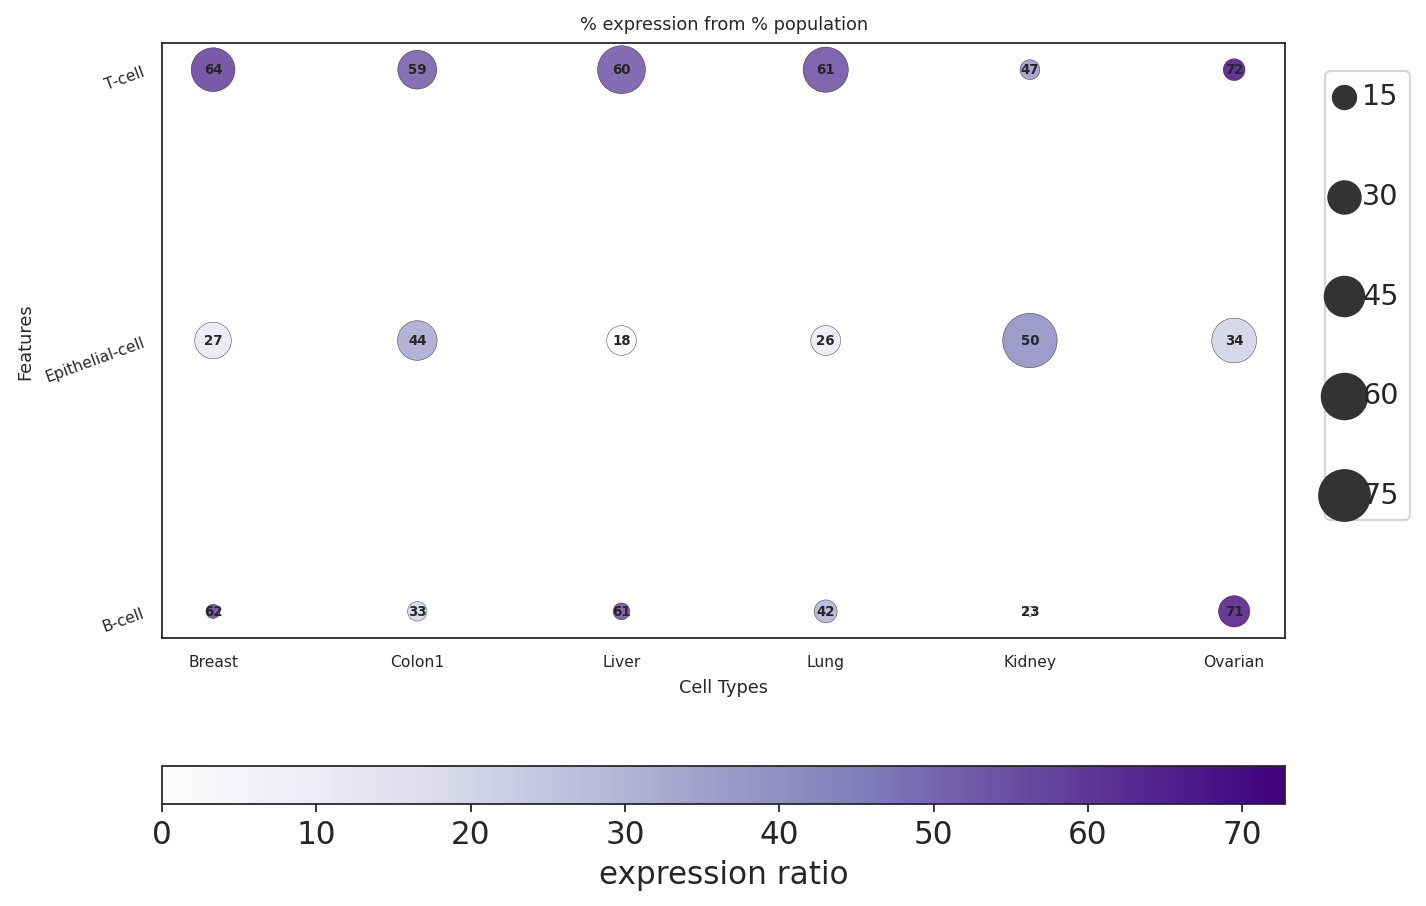

In [51]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(9,7)) 
sns.scatterplot(data=comb, x='y', y='x',palette='Purples',hue=comb["Expressed-ratio"]*100,size=comb['Cell-ratio']*100,ax=ax,sizes=(20,50*12),alpha=0.8,edgecolor='black',linewidth=0.2,)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[-5:], labels=labels[-5:],loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=1,fancybox=True, ncol=1,labelspacing=2.5)
#plt.yticks(np.arange(1,8, 1.0))
#plt.xticks(np.arange(0,7, 1.0))
norm = plt.Normalize(0*100, comb['Expressed-ratio'].max()*100)
sm = plt.cm.ScalarMappable(cmap="Purples", norm=norm)
sm.set_array([])
ax.figure.colorbar(sm,shrink=1,aspect=30,orientation='horizontal',label='expression ratio')
plt.ylabel("Features",size=8)
plt.xlabel("Cell Types",size=8)
plt.title("% expression from % population",size=8)
plt.plot(label='_nolegend_')
plt.xticks(np.arange(1,7),comb.study.unique(),size=7)
plt.yticks(np.arange(1,4),comb.index.unique(),size=7,rotation=20)
for line in range(0,comb.shape[0]):
     ax.text(comb.y[line], comb.x[line], comb['label'][line],verticalalignment='center', horizontalalignment='center', size=6, weight='semibold')
#plt.tight_layout()
plt.savefig(pth+'Figure2G_IP.svg',bbox_inches = "tight",format='svg')
plt.show()


In [52]:
## creating combined ration
comb=[]
i=1
for sts in t2.study.unique():
    val=t2['value'][t2['study']==sts].quantile(0.5)
    #if val < 1:
       # val=1
    dts=pd.DataFrame(t2['From'][(t2.study==sts)&(t2['value']>val)].value_counts().sort_index()/t2['From'][t2.study==sts].value_counts().sort_index())
    dts['Cell-ratio']=t2['From'][(t2.study==sts)].value_counts().sort_index()/len(t2['cell-type'][(t2.study==sts)])
    dts['y']=i
    i=i+1
    dts['x']=np.arange(1,4)
    dts['Study']=sts
    comb.append(dts)
comb=pd.concat(comb)
comb.columns=['Expressed-ratio', 'Cell-ratio', 'y', 'x','study']
comb.index=comb.index.str.slice(18,-1)
comb['label']=(comb['Expressed-ratio']*100).astype(int)

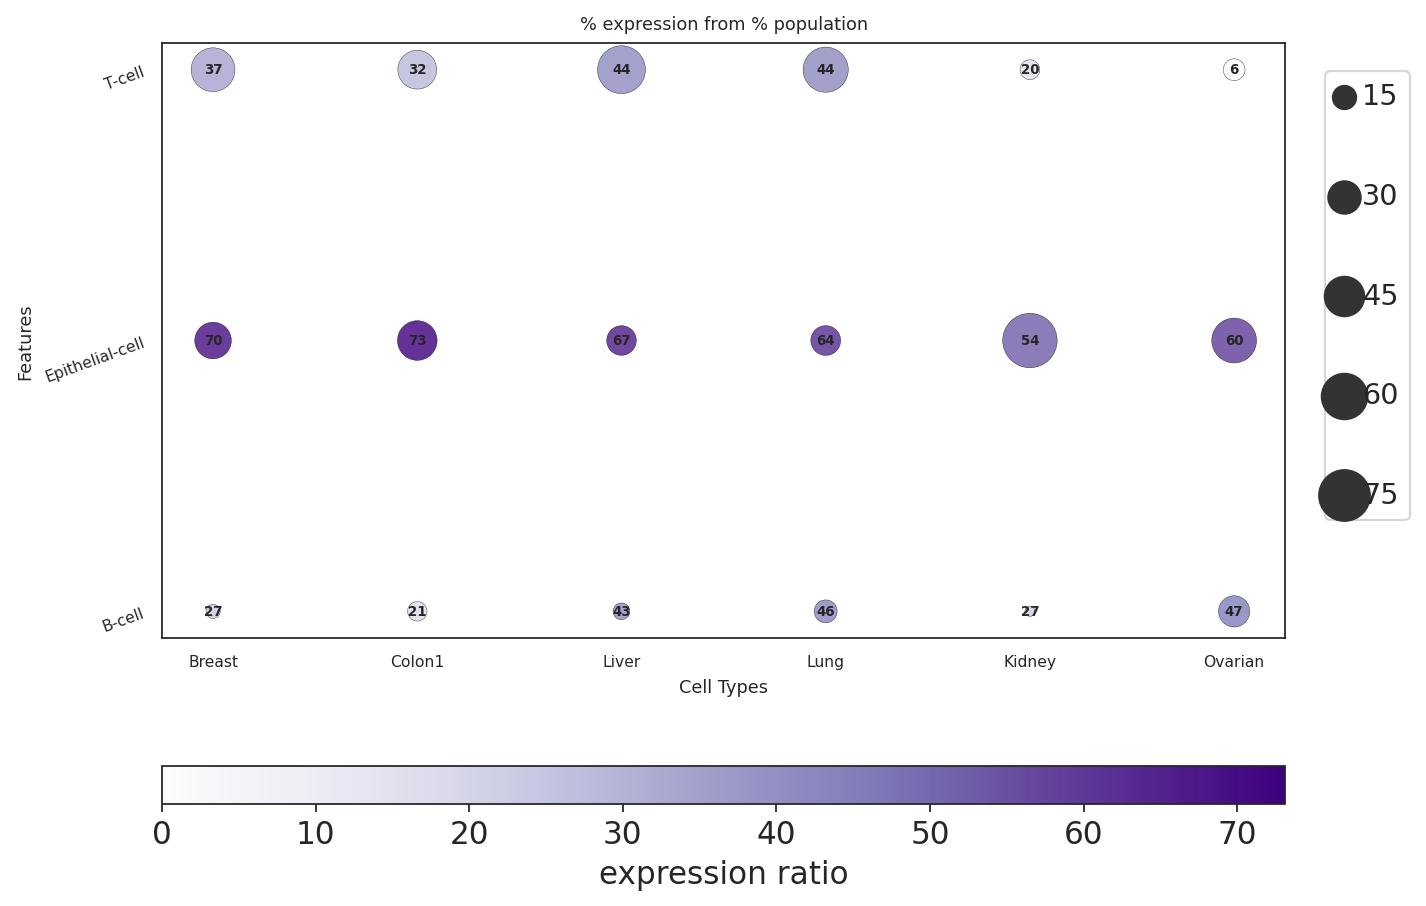

In [53]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(9,7)) 
sns.scatterplot(data=comb, x='y', y='x',palette='Purples',hue=comb["Expressed-ratio"]*100,size=comb['Cell-ratio']*100,ax=ax,sizes=(20,50*12),alpha=0.8,edgecolor='black',linewidth=0.2,)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles[-5:], labels=labels[-5:],loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=1,fancybox=True, ncol=1,labelspacing=2.5)
#plt.yticks(np.arange(1,8, 1.0))
#plt.xticks(np.arange(0,7, 1.0))
norm = plt.Normalize(0*100, comb['Expressed-ratio'].max()*100)
sm = plt.cm.ScalarMappable(cmap="Purples", norm=norm)
sm.set_array([])
ax.figure.colorbar(sm,shrink=1,aspect=30,orientation='horizontal',label='expression ratio')
plt.ylabel("Features",size=8)
plt.xlabel("Cell Types",size=8)
plt.title("% expression from % population",size=8)
plt.plot(label='_nolegend_')
plt.xticks(np.arange(1,7),comb.study.unique(),size=7)
plt.yticks(np.arange(1,4),comb.index.unique(),size=7,rotation=20)
for line in range(0,comb.shape[0]):
     ax.text(comb.y[line], comb.x[line], comb['label'][line],verticalalignment='center', horizontalalignment='center', size=6, weight='semibold')
#plt.tight_layout()
plt.savefig(pth+'Figure2G_CP.svg',bbox_inches = "tight",format='svg')
plt.show()


### Figure 2F,3C-D

In [54]:
def annotate(ax,x,y):
    r, p = scipy.stats.spearmanr(x, y)
    #ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

In [79]:
cold=pd.read_csv(pth+'colon_all.csv',index_col=0)
cold.head()

,Index,Patient,Class,Sample,Cell_type,Cell_subtype,PSMB5,PSMB6,PSMB7,PSMB8,PSMB9,PSMB10,PTPRC,Immunoproteasome,Const_proteasome
0,SMC01-T_AAACCTGCATACGCCG,SMC01,Tumor,SMC01-T,Epithelial cells,CMS2,1.576790,1.313991,3.153579,3.679176,4.730369,1.051193,0.0,1.927115,1.543438
1,SMC01-T_AAACCTGGTCGCATAT,SMC01,Tumor,SMC01-T,Epithelial cells,CMS2,2.962963,1.777778,3.555556,2.370370,1.777778,0.592593,0.0,1.299405,1.882712
3,SMC01-T_AAACGGGAGGGAAACA,SMC01,Tumor,SMC01-T,Epithelial cells,CMS2,2.665245,0.000000,2.665245,0.000000,0.000000,0.000000,0.0,0.000000,1.249273
4,SMC01-T_AAACGGGGTATAGGTA,SMC01,Tumor,SMC01-T,Epithelial cells,CMS2,1.667292,1.250469,2.084115,3.751407,1.667292,0.833646,0.0,1.512815,1.403486
5,SMC01-T_AAAGATGAGGCCGAAT,SMC01,Tumor,SMC01-T,Epithelial cells,CMS2,1.915464,0.638488,6.384881,1.915464,5.107904,0.638488,0.0,1.622256,1.713555


In [80]:
cold.Cell_type.unique()

array(['Epithelial cells', 'Stromal cells', 'Myeloids', 'T cells',
       'B cells', 'Mast cells'], dtype=object)

In [81]:
dt=pd.DataFrame(index=cold['Patient'].unique(), columns=['pseudo_ip_expresion', 'pseudo_CD45_expresion','pseudo_cp_expresion'])
cells=['T cells']
for ps in dt.index:
    dt.loc[ps,'pseudo_ip_expresion']=cold['Immunoproteasome'][(cold['Cell_type'].isin(cells))&(cold['Patient']==ps)&(cold['Class'].isin(['Tumor',True]))].sum()
    dt.loc[ps,'pseudo_CD45_expresion']=cold['PTPRC'][(cold['Cell_type'].isin(cells))&(cold['Patient']==ps)&(cold['Class'].isin(['Tumor',True]))].sum()
    dt.loc[ps,'pseudo_cp_expresion']=cold['Const_proteasome'][(cold['Cell_type'].isin(cells))&(cold['Patient']==ps)&(cold['Class'].isin(['Tumor',True]))].sum()

dt=dt.astype('float')
dt=np.log2(dt+1)
dt2=dt

dt=pd.DataFrame(index=cold['Patient'].unique(), columns=['pseudo_ip_expresion', 'pseudo_CD45_expresion','pseudo_cp_expresion'])
cells=['Epithelial cells']
for ps in dt.index:
    dt.loc[ps,'pseudo_ip_expresion']=cold['Immunoproteasome'][(cold['Cell_type'].isin(cells))&(cold['Patient']==ps)&(cold['Class'].isin(['Tumor',True]))].sum()
    dt.loc[ps,'pseudo_CD45_expresion']=cold['PTPRC'][(cold['Patient']==ps)&(cold['Class'].isin(['Tumor',True]))].sum()
    dt.loc[ps,'pseudo_cp_expresion']=cold['Const_proteasome'][(cold['Cell_type'].isin(cells))&(cold['Patient']==ps)&(cold['Class'].isin(['Tumor',True]))].sum()
dt=dt.astype('float')
dt=np.log2(dt+1)

/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an ex

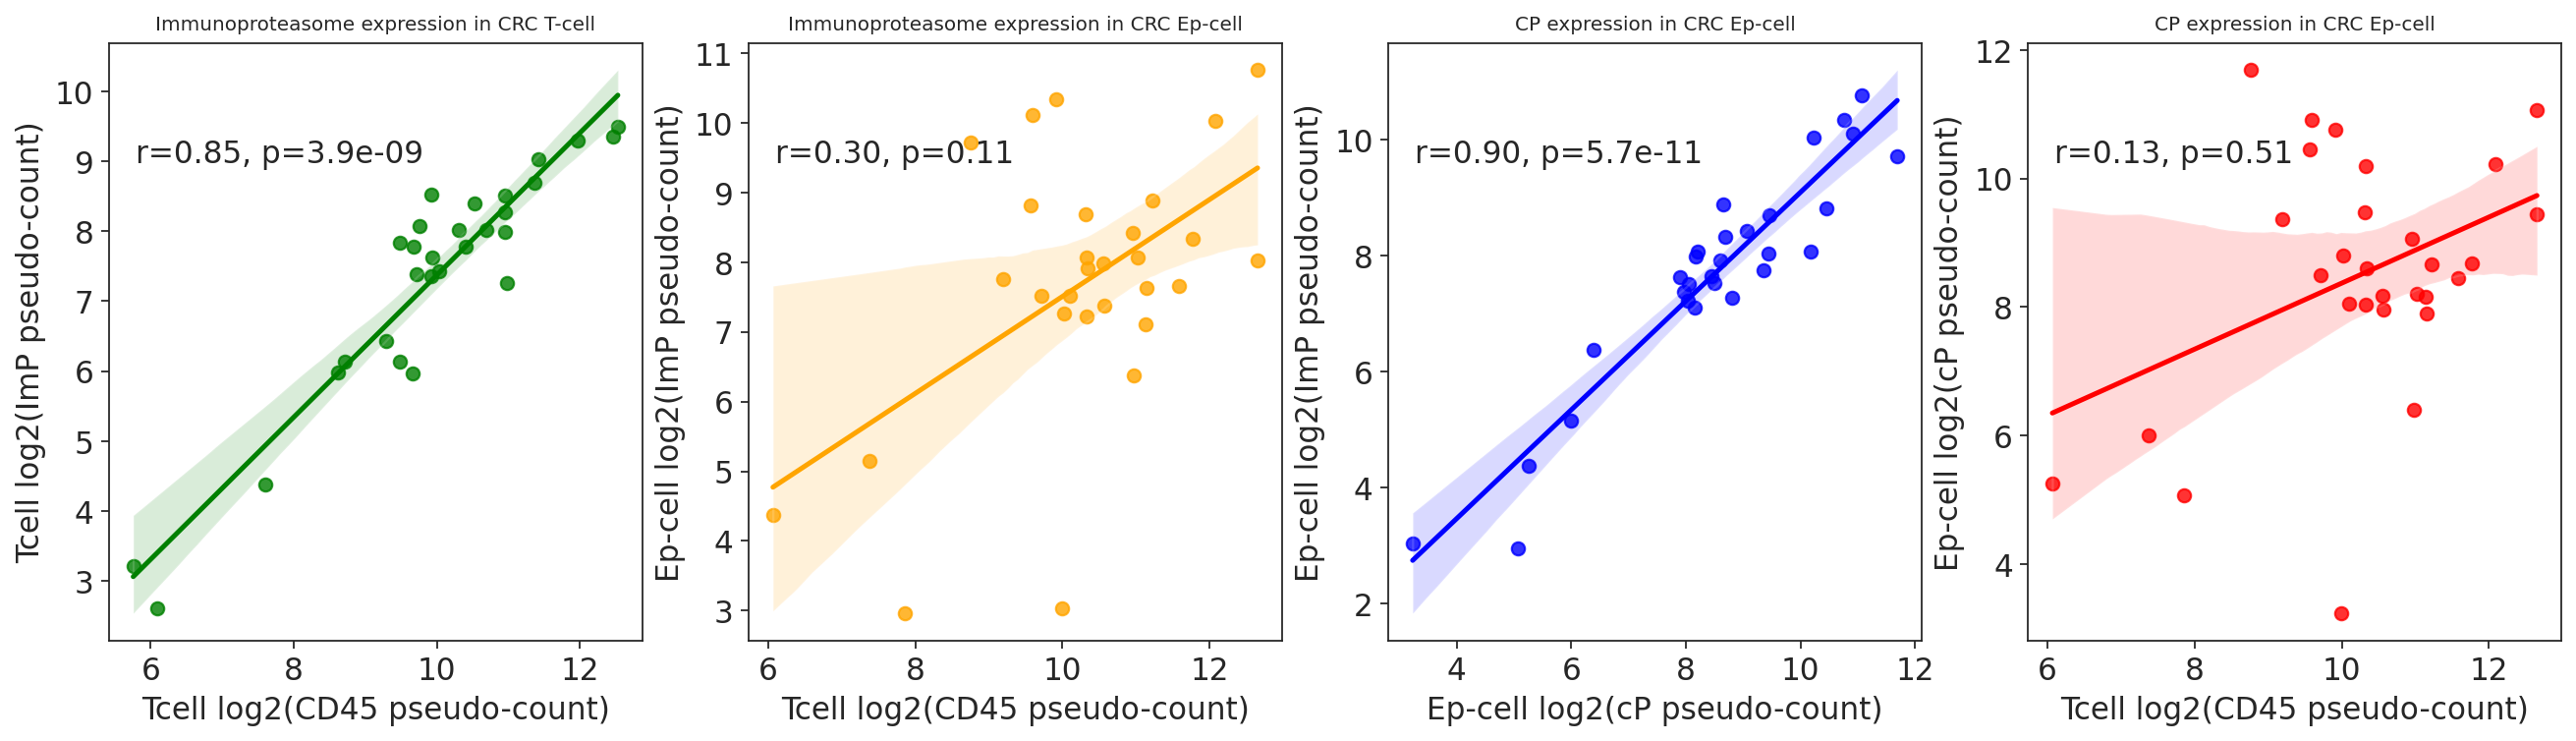

In [62]:
#cold=cold[(cold['Immunoproteasome']>1)&(cold['Const_proteasome']>1)]
sns.set_style("ticks")
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
ax=sns.regplot(dt2['pseudo_CD45_expresion'], dt2['pseudo_ip_expresion'],scatter=True,ax=axes[0],color='green')
annotate(axes[0], dt2['pseudo_CD45_expresion'],dt2['pseudo_ip_expresion'])
ax=sns.regplot(dt['pseudo_CD45_expresion'], dt['pseudo_ip_expresion'],scatter=True,ax=axes[1],color='orange')
annotate(axes[1], dt['pseudo_CD45_expresion'],dt['pseudo_ip_expresion'])
ax=sns.regplot(dt['pseudo_cp_expresion'], dt['pseudo_ip_expresion'],scatter=True,ax=axes[2],color='blue')
annotate(axes[2], dt['pseudo_ip_expresion'],dt['pseudo_cp_expresion'])
ax=sns.regplot(dt['pseudo_CD45_expresion'], dt['pseudo_cp_expresion'],scatter=True,ax=axes[3],color='red')
annotate(axes[3], dt['pseudo_CD45_expresion'],dt['pseudo_cp_expresion'])
axes[0].set_xlabel(F"Tcell log2(CD45 pseudo-count)")
axes[0].set_ylabel(F"Tcell log2(ImP pseudo-count)")
axes[0].set_title(F"Immunoproteasome expression in CRC T-cell", size=9)

axes[1].set_xlabel(F"Tcell log2(CD45 pseudo-count)")
axes[1].set_ylabel(F"Ep-cell log2(ImP pseudo-count)")
axes[1].set_title(F"Immunoproteasome expression in CRC Ep-cell", size=9)

axes[2].set_xlabel(F"Ep-cell log2(cP pseudo-count)")
axes[2].set_ylabel(F"Ep-cell log2(ImP pseudo-count)")
axes[2].set_title(F"CP expression in CRC Ep-cell", size=9)

axes[3].set_xlabel(F"Tcell log2(CD45 pseudo-count)")
axes[3].set_ylabel(F"Ep-cell log2(cP pseudo-count)")
axes[3].set_title(F"CP expression in CRC Ep-cell", size=9)

              
plt.savefig(pth+"Figure2F_colon.svg",format="svg")
plt.show()

In [66]:
temp=pd.read_csv(pth+'breast_score.csv',index_col=0)

In [67]:
temp=temp[temp['Const_proteasome']>temp['Const_proteasome'].quantile(0.5)]

In [68]:
temp.head()

,NAME,Patient,Percent_mito,nCount_RNA,nFeature_RNA,celltype_major,celltype_minor,celltype_subset,subtype,gene_module,...,CNA_value,PSMB5,PSMB6,PSMB7,PSMB8,PSMB9,PSMB10,PTPRC,Immunoproteasome,Const_proteasome
4,CID3586_ACTGATGGTCAACTGT,CID3586,13.325541,1711,807,Endothelial,Endothelial ACKR1,Endothelial ACKR1,HER2+,no_gene_module,...,no_CNA_value,5.844535,0.000000,0.0,5.844535,0.000000,0.0,0.0,0.924984,0.924984
8,CID3586_ATCATCTAGGGATACC,CID3586,5.273070,1593,828,Endothelial,Endothelial ACKR1,Endothelial ACKR1,HER2+,no_gene_module,...,no_CNA_value,0.000000,6.277464,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.954479
10,CID3586_ATGTGTGAGTCAATAG,CID3586,7.703595,1363,767,Endothelial,Endothelial ACKR1,Endothelial ACKR1,HER2+,no_gene_module,...,no_CNA_value,0.000000,7.336757,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.019829
12,CID3586_ATTGGACTCCTATTCA,CID3586,8.014113,1984,927,Endothelial,Endothelial ACKR1,Endothelial ACKR1,HER2+,no_gene_module,...,no_CNA_value,5.040322,5.040322,0.0,5.040322,5.040322,0.0,0.0,1.729750,1.729750
14,CID3586_CAAGGCCAGTGTTTGC,CID3586,3.349282,2090,1182,Endothelial,Endothelial ACKR1,Endothelial ACKR1,HER2+,no_gene_module,...,no_CNA_value,0.000000,4.784689,0.0,9.569378,0.000000,0.0,0.0,1.133940,0.844080


In [69]:
temp.celltype_major.unique()

array(['Endothelial', 'CAFs', 'PVL', 'B-cells', 'T-cells', 'Myeloid',
       'Normal Epithelial', 'Plasmablasts', 'Cancer Epithelial'],
      dtype=object)

In [70]:
dt=pd.DataFrame(index=temp['Patient'][temp['celltype_major']=='Cancer Epithelial'].unique(), columns=['pseudo_ip_expresion', 'pseudo_CD45_expresion','pseudo_cp_expresion'])
cells=['T-cells']
for ps in dt.index:
    dt.loc[ps,'pseudo_ip_expresion']=temp['Immunoproteasome'][(temp['celltype_major'].isin(cells))&(temp['Patient']==ps)].sum()
    dt.loc[ps,'pseudo_CD45_expresion']=temp['PTPRC'][(temp['Patient']==ps)&(temp['celltype_major'].isin(cells))].sum()
    dt.loc[ps,'pseudo_cp_expresion']=temp['Const_proteasome'][(temp['celltype_major'].isin(cells))&(temp['Patient']==ps)].sum()
dt=dt.astype('float')
dt=np.log2(dt+1)
dt2=dt

dt=pd.DataFrame(index=temp['Patient'][temp['celltype_major']=='Cancer Epithelial'].unique(), columns=['pseudo_ip_expresion', 'pseudo_CD45_expresion','pseudo_cp_expresion'])
cells=['Cancer Epithelial']
for ps in dt.index:
    dt.loc[ps,'pseudo_ip_expresion']=temp['Immunoproteasome'][(temp['celltype_major'].isin(cells))&(temp['Patient']==ps)].sum()
    dt.loc[ps,'pseudo_CD45_expresion']=temp['PTPRC'][(temp['Patient']==ps)].sum()
    dt.loc[ps,'pseudo_cp_expresion']=temp['Const_proteasome'][(temp['celltype_major'].isin(cells))&(temp['Patient']==ps)].sum()
dt=dt.astype('float')
dt=np.log2(dt+1)


/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/sabari/dbhavya/miniconda3/envs/single-cell/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an ex

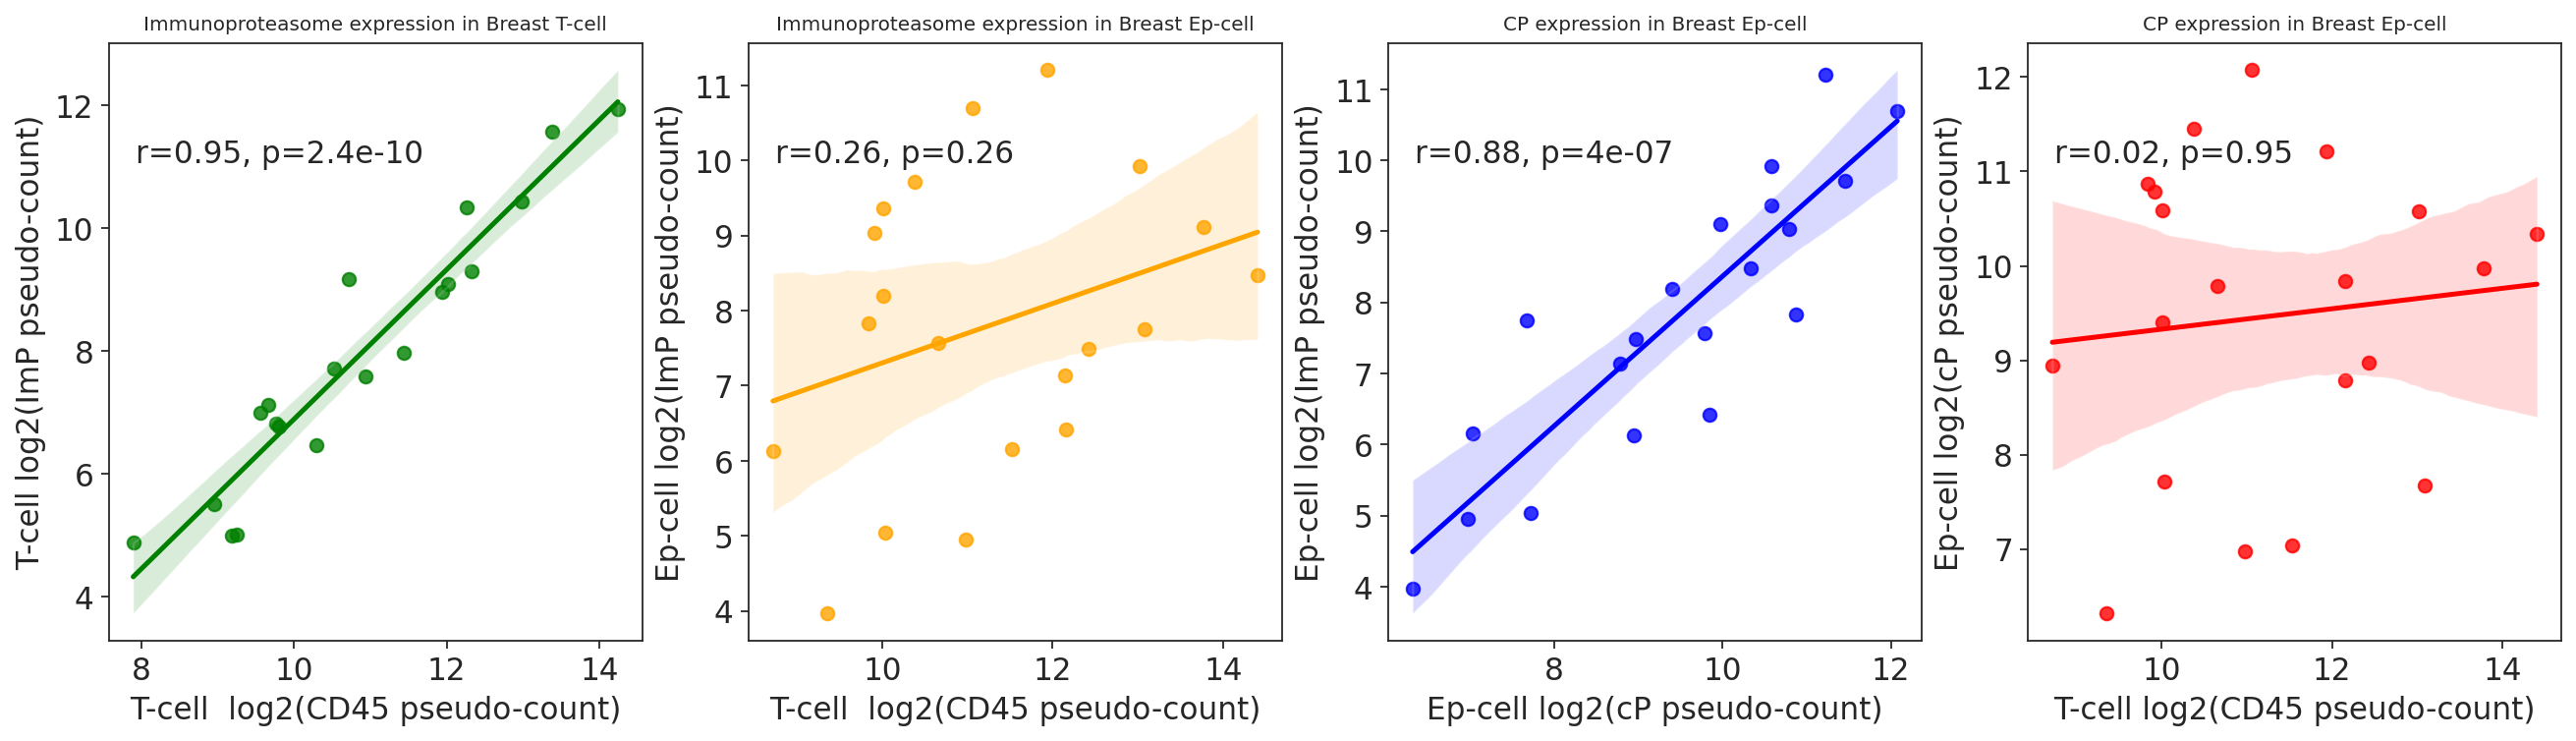

In [71]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
ax=sns.regplot(dt2['pseudo_CD45_expresion'], dt2['pseudo_ip_expresion'],scatter=True,ax=axes[0],color='green')
annotate(axes[0], dt2['pseudo_CD45_expresion'],dt2['pseudo_ip_expresion'])
ax=sns.regplot(dt['pseudo_CD45_expresion'], dt['pseudo_ip_expresion'],scatter=True,ax=axes[1],color='orange')
annotate(axes[1], dt['pseudo_CD45_expresion'],dt['pseudo_ip_expresion'])
ax=sns.regplot(dt['pseudo_cp_expresion'], dt['pseudo_ip_expresion'],scatter=True,ax=axes[2],color='blue')
annotate(axes[2], dt['pseudo_ip_expresion'],dt['pseudo_cp_expresion'])
ax=sns.regplot(dt['pseudo_CD45_expresion'], dt['pseudo_cp_expresion'],scatter=True,ax=axes[3],color='red')
annotate(axes[3], dt['pseudo_CD45_expresion'],dt['pseudo_cp_expresion'])
axes[0].set_xlabel(F"T-cell  log2(CD45 pseudo-count)")
axes[0].set_ylabel(F"T-cell log2(ImP pseudo-count)")
axes[0].set_title(F"Immunoproteasome expression in Breast T-cell", size=9)

axes[1].set_xlabel(F"T-cell  log2(CD45 pseudo-count)")
axes[1].set_ylabel(F"Ep-cell log2(ImP pseudo-count)")
axes[1].set_title(F"Immunoproteasome expression in Breast Ep-cell", size=9)

axes[2].set_xlabel(F"Ep-cell log2(cP pseudo-count)")
axes[2].set_ylabel(F"Ep-cell log2(ImP pseudo-count)")
axes[2].set_title(F"CP expression in Breast Ep-cell", size=9)

axes[3].set_xlabel(F"T-cell log2(CD45 pseudo-count)")
axes[3].set_ylabel(F"Ep-cell log2(cP pseudo-count)")
axes[3].set_title(F"CP expression in Breast Ep-cell", size=9)

              
plt.savefig(pth+"Figure2F_breast.svg",format="svg")
plt.show()